In [78]:
import pandas as pd
import numpy as np

In [79]:
df = pd.DataFrame({"exam_result":['pass','fail','fail','pass','fail','fail','pass','pass','pass','pass','pass','pass',
                             'fail','fail','fail'],
                "online_course":['yes','no','yes','yes','no','yes','yes','yes','no','no','yes','no','yes','no','no'],
                "student_background":['maths','maths','maths','cs','other','other','maths','cs','maths','cs','cs',
                                      'maths','other','other','maths'],
                "working_status":['nw','w','w','nw','w','w','nw','nw','w','w','w','nw','w','nw','w']})

In [80]:
a = df[df['exam_result']==df['exam_result'].unique()[0]].shape[0]
b = df[df['exam_result']==df['exam_result'].unique()[1]].shape[0]
c = -a/df.shape[0]*np.log2(a/df.shape[0])
d = -b/df.shape[0]*np.log2(b/df.shape[0])
entropy_output_variable = c+d
entropy_output_variable

0.9967916319816366

In [81]:
def calculate_information_gain(df):
    new_dic = {}
    for col in ['student_background','online_course','working_status']:
    
        entropy = []
        for category in df[col].unique():
        
            p = df[(df[col] == category) & (df['exam_result'] == 'pass')].shape[0]
            q = df[(df[col] == category) & (df['exam_result'] == 'fail')].shape[0]
            d = df[df[col] == category].shape[0]
            if p==0 :
                x = 0
            else:
                x = -p/d*np.log2(p/d)
            
            if q == 0:
                y = 0
            else:
                y = -q/d*np.log2(q/d)
        
            if d == 0:
                x = 0
                y = 0
            first = x+y
        
            entropy.append(d/df.shape[0]*first)
        weighted_entropy = 0
        for ent in entropy:
            weighted_entropy = weighted_entropy+ent
    
        new_dic[col] = weighted_entropy
    information_gain_dic = {}
    for i,j in new_dic.items():
        information_gain_dic.update({i:entropy_output_variable-j})
    return information_gain_dic

In [82]:
calculate_information_gain(df)

{'student_background': 0.5370185018323193,
 'online_course': 0.02798703360567112,
 'working_status': 0.18580516288960125}

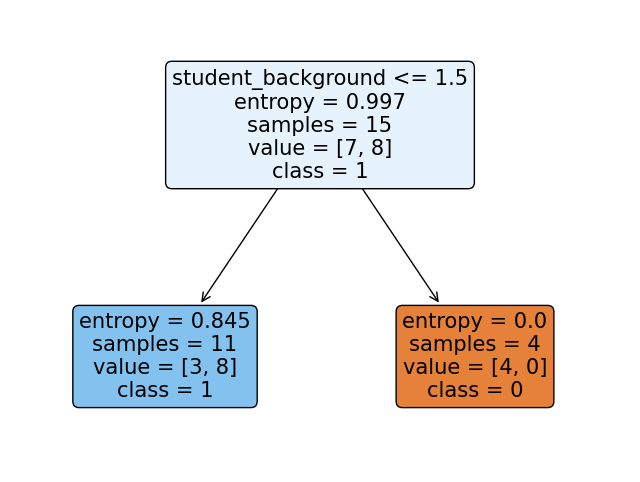

In [83]:
   
# Feature selection for the first step in making decision tree 
selected_feature = 'student_background'
  
# Create a decision tree 
from sklearn.tree import DecisionTreeClassifier,plot_tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1) 
X = df[[selected_feature]].replace({'maths':0,'cs':1,'other':2}) 
y = df['exam_result'] 
clf.fit(X, y) 
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6)) 
plot_tree(clf, feature_names=[selected_feature], class_names=['0', '1'], filled=True, rounded=True) 
plt.show() 

In [84]:
new_df = df[df['student_background']=='maths']

In [85]:
calculate_information_gain(new_df)

{'student_background': 0.011563495947385038,
 'online_course': 0.031807703101141116,
 'working_status': 0.5332041322907035}

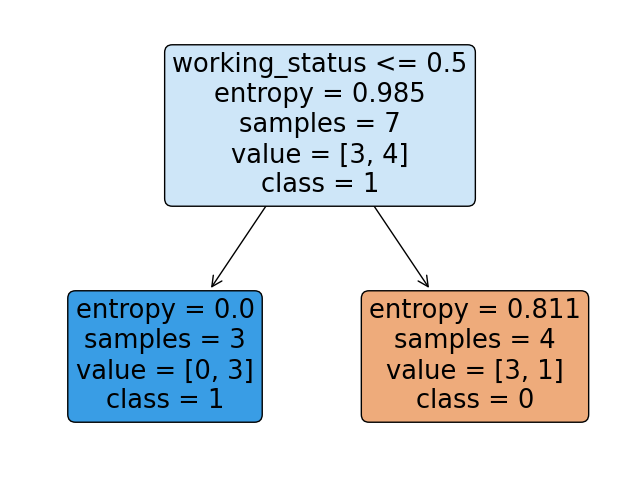

In [89]:
   
# Feature selection for the second step in making decision tree 
selected_feature = 'working_status'
  
# Create a decision tree 
from sklearn.tree import DecisionTreeClassifier,plot_tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1) 
X = new_df[[selected_feature]].replace({'nw':0,'w':1}) 
y = new_df['exam_result'] 
clf.fit(X, y) 
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6)) 
plot_tree(clf, feature_names=[selected_feature], class_names=['0', '1'], filled=True, rounded=True) 
plt.show() 